In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import cv2

%matplotlib notebook

In [6]:
# exp_dir = r'C:\Users\Guy\OneDrive - Technion\Project_B\A2C_PHASE_3\BreakoutNoFrameskip-v4_4e7_a2c_exp_2019-09-28_11-00-00'
exp_dir = '/home/manor/anaconda3/envs/openAIenv/baselines/models/BreakoutNoFrameskip-v4_4e7_a2c_exp_2019-09-29_18-30-00'
obs_dir = os.path.join(exp_dir, 'obs_dir')
exp_dir = os.path.abspath(exp_dir)
obs_dir = os.path.abspath(obs_dir)
assert os.path.exists(exp_dir)
assert os.path.exists(obs_dir)

AssertionError: 

In [7]:
obs = []
for obs_file in os.listdir(obs_dir):
    obs.append(np.load(os.path.join(obs_dir, obs_file)))
    
obs = np.concatenate([o for o in obs], axis=0)
print("obs shape : {}, obs dtype: {}".format(obs.shape, obs.dtype))

FileNotFoundError: [Errno 2] No such file or directory: '/home/manor/anaconda3/envs/openAIenv/baselines/models/BreakoutNoFrameskip-v4_4e7_a2c_exp_2019-09-29_18-30-00/obs_dir'

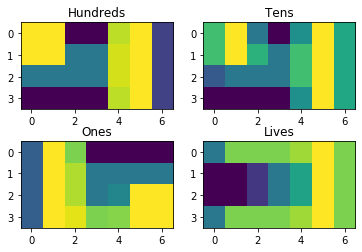

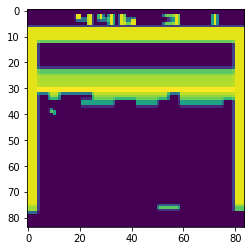

Hundreds
--------
[[142 142   0   0 128 142  28]
 [142 142  57  57 133 142  28]
 [ 57  57  57  57 133 142  28]
 [  0   0   0   0 128 142  28]]
Tens
----
[[ 99 142  57   0  71 142  85]
 [ 99 142  91  57  99 142  85]
 [ 40  57  57  57  99 142  85]
 [  0   0   0   0  71 142  85]]
Ones
----
[[ 43 142 114   0   0   0   0]
 [ 43 142 125  57  57  57  57]
 [ 43 142 125  57  65 142 142]
 [ 43 142 136 114 116 142 142]]
Lives
-----
[[ 57 114 114 114 122 142 114]
 [  0   0  23  57  82 142 114]
 [  0   0  23  57  82 142 114]
 [ 57 114 114 114 122 142 114]]


In [4]:
idx=np.random.randint(obs.shape[0])
frame = obs[idx,:,:,3]
hundreds = frame[2:6,19:26]
tens     = frame[2:6,27:34]
ones     = frame[2:6,35:42]
lives    = frame[2:6,52:59]

fig,axes = plt.subplots(2,2)
axes[0,0].imshow(hundreds)
axes[0,0].set_title('Hundreds')
axes[0,1].imshow(tens)
axes[0,1].set_title('Tens')
axes[1,0].imshow(ones)
axes[1,0].set_title('Ones')
axes[1,1].imshow(lives)
axes[1,1].set_title('Lives')
plt.show()

fig, ax = plt.subplots()
ax.imshow(frame)
plt.show()

print("Hundreds\n--------")
print(hundreds)
print("Tens\n----")
print(tens)
print("Ones\n----")
print(ones)
print("Lives\n-----")
print(lives)

In [5]:
def get_digit(obs=None, which=None, method=cv2.TM_CCOEFF_NORMED):
    """
    return the digit from raw image
    method: string in [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
                       cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
    """
    assert obs is not None
    assert obs.shape[0] == 4 and obs.shape[1] == 7
    assert obs.dtype in [np.uint8, np.float32]
    assert method in [cv2.TM_CCOEFF, cv2.TM_CCOEFF_NORMED, cv2.TM_CCORR,
                      cv2.TM_CCORR_NORMED, cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]
    assert which in ['hundreds', 'tens', 'ones', 'lives']
    
    if which == 'ones': #units digit
        digits_filters = {
                          '0': np.array([[ 43, 142, 136, 114, 116, 142, 142],
                                         [ 43, 142, 114,   0,  14, 142, 142],
                                         [ 43, 142, 114,   0,  14, 142, 142],
                                         [ 43, 142, 136, 114, 116, 142, 142],]),
                          '1': np.array([[  0,   0,  28, 142, 128,   0,   0],
                                         [  0,   0,  28, 142, 128,   0,   0],
                                         [  0,   0,  28, 142, 128,   0,   0],
                                         [  0,   0,  28, 142, 128,   0,   0],]),
                          '2': np.array([[ 34, 114, 114, 114, 116, 142, 142],
                                         [ 17,  57,  57,  57,  65, 142, 142],
                                         [ 43, 142, 125,  57,  57,  57,  57],
                                         [ 43, 142, 136, 114, 114, 114, 114],]),
                          '3': np.array([[ 34, 114, 114, 114, 116, 142, 142],
                                         [  0,   0,  11,  57,  65, 142, 142],
                                         [  0,   0,  11,  57,  65, 142, 142],
                                         [ 34, 114, 114, 114, 116, 142, 142],]),
                          '4': np.array([[ 43, 142, 114,   0,  14, 142, 142],
                                         [ 43, 142, 125,  57,  65, 142, 142],
                                         [ 17,  57,  57,  57,  65, 142, 142],
                                         [  0,   0,   0,   0,  14, 142, 142],]),
                          '5': np.array([[ 43, 142, 136, 114, 114, 114, 114],
                                         [ 43, 142, 125,  57,  57,  57,  57],
                                         [ 17,  57,  57,  57,  65, 142, 142],
                                         [ 34, 114, 114, 114, 116, 142, 142],]),
                          '6': np.array([[ 43, 142, 114,   0,   0,   0,   0],
                                         [ 43, 142, 125,  57,  57,  57,  57],
                                         [ 43, 142, 125,  57,  65, 142, 142],
                                         [ 43, 142, 136, 114, 116, 142, 142],]),
                          '7': np.array([[ 34, 114, 114, 114, 116, 142, 142],
                                         [  0,   0,   0,   0,  14, 142, 142],
                                         [  0,   0,   0,   0,  14, 142, 142],
                                         [  0,   0,   0,   0,  14, 142, 142],]),
                          '8': np.array([[ 43, 142, 136, 114, 116, 142, 142],
                                         [ 43, 142, 125,  57,  65, 142, 142],
                                         [ 43, 142, 125,  57,  65, 142, 142],
                                         [ 43, 142, 136, 114, 116, 142, 142],]),
                          '9': np.array([[ 43, 142, 136, 114, 116, 142, 142],
                                         [ 43, 142, 125,  57,  65, 142, 142],
                                         [ 17,  57,  57,  57,  65, 142, 142],
                                         [  0,   0,   0,   0,  14, 142, 142],])
        }
    elif which == 'tens': #tens digit
        digits_filters = {
                          '0': np.array([[ 99, 142, 125, 114, 128, 142,  85],
                                         [ 99, 142,  57,   0,  71, 142,  85],
                                         [ 99, 142,  57,   0,  71, 142,  85],
                                         [ 99, 142, 125, 114, 128, 142,  85],]),
                          '1': np.array([[  0,   0,  85, 142,  71,   0,   0],
                                         [  0,   0,  85, 142,  71,   0,   0],
                                         [  0,   0,  85, 142,  71,   0,   0],
                                         [  0,   0,  85, 142,  71,   0,   0],]),
                          '2': np.array([[ 80, 114, 114, 114, 128, 142,  85],
                                         [ 40,  57,  57,  57,  99, 142,  85],
                                         [ 99, 142,  91,  57,  57,  57,  34],
                                         [ 99, 142, 125, 114, 114, 114,  68],]),
                          '3': np.array([[ 80, 114, 114, 114, 128, 142,  85],
                                         [  0,   0,  34,  57,  99, 142,  85],
                                         [  0,   0,  34,  57,  99, 142,  85],
                                         [ 80, 114, 114, 114, 128, 142,  85],]),
                          '4': np.array([[ 99, 142,  57,   0,  71, 142,  85],
                                         [ 99, 142,  91,  57,  99, 142,  85],
                                         [ 40,  57,  57,  57,  99, 142,  85],
                                         [  0,   0,   0,   0,  71, 142,  85],]),
                          '5': np.array([[ 99, 142, 125, 114, 114, 114,  68],
                                         [ 99, 142,  91,  57,  57,  57,  34],
                                         [ 40,  57,  57,  57,  99, 142,  85],
                                         [ 80, 114, 114, 114, 128, 142,  85],]),
                          '6': np.array([[ 99, 142,  57,   0,   0,   0,   0],
                                         [ 99, 142,  91,  57,  57,  57,  34],
                                         [ 99, 142,  91,  57,  99, 142,  85],
                                         [ 99, 142, 125, 114, 128, 142,  85],]),
                          '7': np.array([[ 34, 114, 114, 114, 116, 142, 142],
                                         [  0,   0,   0,   0,  14, 142, 142],
                                         [  0,   0,   0,   0,  14, 142, 142],
                                         [  0,   0,   0,   0,  14, 142, 142],]),
                          '8': np.array([[ 99, 142, 125, 114, 128, 142,  85],
                                         [ 99, 142,  91,  57,  99, 142,  85],
                                         [ 99, 142,  91,  57,  99, 142,  85],
                                         [ 99, 142, 125, 114, 128, 142,  85],]),
                          '9': np.array([[ 99, 142, 125, 114, 128, 142,  85],
                                         [ 99, 142,  91,  57,  99, 142,  85],
                                         [ 40,  57,  57,  57,  99, 142,  85],
                                         [  0,   0,   0,   0,  71, 142,  85],])
        }
    elif which == 'hundreds': # manorz: can't find an example with hundreds digit of order '9'. leave it for now.
        digits_filters = {
                          '0': np.array([[142, 142, 114, 114, 139, 142,  28],
                                         [142, 142,   0,   0, 128, 142,  28],
                                         [142, 142,   0,   0, 128, 142,  28],
                                         [142, 142, 114, 114, 139, 142,  28],]),
                          '1': np.array([[  0,   0, 142, 142,  14,   0,   0],
                                         [  0,   0, 142, 142,  14,   0,   0],
                                         [  0,   0, 142, 142,  14,   0,   0],
                                         [  0,   0, 142, 142,  14,   0,   0],]),
                          '2': np.array([[114, 114, 114, 114, 139, 142,  28],
                                         [ 57,  57,  57,  57, 133, 142,  28],
                                         [142, 142,  57,  57,  57,  57,  11],
                                         [142, 142, 114, 114, 114, 114,  23],]),
                          '3': np.array([[114, 114, 114, 114, 139, 142,  28],
                                         [  0,   0,  57,  57, 133, 142,  28],
                                         [  0,   0,  57,  57, 133, 142,  28],
                                         [114, 114, 114, 114, 139, 142,  28],]),
                          '4': np.array([[142, 142,   0,   0, 128, 142,  28],
                                         [142, 142,  57,  57, 133, 142,  28],
                                         [ 57,  57,  57,  57, 133, 142,  28],
                                         [  0,   0,   0,   0, 128, 142,  28],]),
                          '5': np.array([[142, 142, 114, 114, 114, 114,  23],
                                         [142, 142,  57,  57,  57,  57,  11],
                                         [ 57,  57,  57,  57, 133, 142,  28],
                                         [114, 114, 114, 114, 139, 142,  28],]),
                          '6': np.array([[142, 142,   0,   0,   0,   0,   0],
                                         [142, 142,  57,  57,  57,  57,  11],
                                         [142, 142,  57,  57, 133, 142,  28],
                                         [142, 142, 114, 114, 139, 142,  28],]),
                          '7': np.array([[114, 114, 114, 114, 139, 142,  28],
                                         [  0,   0,   0,   0, 128, 142,  28],
                                         [  0,   0,   0,   0, 128, 142,  28],
                                         [  0,   0,   0,   0, 128, 142,  28],]),
                          '8': np.array([[142, 142, 114, 114, 139, 142,  28],
                                         [142, 142,  57,  57, 133, 142,  28],
                                         [142, 142,  57,  57, 133, 142,  28],
                                         [142, 142, 114, 114, 139, 142,  28],])
        }
    elif which == 'lives': # manorz: 'zero' lives doesn't exist
        digits_filters = {
                          '1': np.array([[  0,   0,  57, 142,  99,   0,   0],
                                         [  0,   0,  57, 142,  99,   0,   0],
                                         [  0,   0,  57, 142,  99,   0,   0],
                                         [  0,   0,  57, 142,  99,   0,   0],]),
                          '2': np.array([[ 57, 114, 114, 114, 122, 142, 114],
                                         [ 28,  57,  57,  57,  82, 142, 114],
                                         [ 71, 142, 108,  57,  57,  57,  45],
                                         [ 71, 142, 131, 114, 114, 114,  91],]),
                          '3': np.array([[ 57, 114, 114, 114, 122, 142, 114],
                                         [  0,   0,  23,  57,  82, 142, 114],
                                         [  0,   0,  23,  57,  82, 142, 114],
                                         [ 57, 114, 114, 114, 122, 142, 114],]),
                          '4': np.array([[ 71, 142,  85,   0,  43, 142, 114],
                                         [ 71, 142, 108,  57,  82, 142, 114],
                                         [ 28,  57,  57,  57,  82, 142, 114],
                                         [  0,   0,   0,   0,  43, 142, 114],]),
                          '5': np.array([[ 71, 142, 131, 114, 114, 114,  91],
                                         [ 71, 142, 108,  57,  57,  57,  45],
                                         [ 28,  57,  57,  57,  82, 142, 114],
                                         [ 57, 114, 114, 114, 122, 142, 114],])
        }
    min_mse = np.inf
    digit = None
    for dig,filt in digits_filters.items():
        mse = ((obs - filt)**2).mean()
        if mse < min_mse:
            min_mse = mse
            digit = int(dig)
    return digit

In [6]:
def get_score_and_lives(frame=None):
    assert frame is not None
    assert frame.shape[0] == 84 and frame.shape[1] == 84
    hundreds = frame[2:6,19:26]
    tens     = frame[2:6,27:34]
    ones     = frame[2:6,35:42]
    lives    = frame[2:6,52:59]
    tasks    = {'hundreds' : hundreds, 'tens' : tens, 'ones' : ones, 'lives' : lives}
    res      = dict()
    for k,v in tasks.items():
        res[k] = get_digit(obs=v, which=k)
    score = res['hundreds']*100 + res['tens']*10 + res['ones']
    lives = res['lives']
    return score,lives
    
get_score_and_lives(frame=frame)

(446, 3)

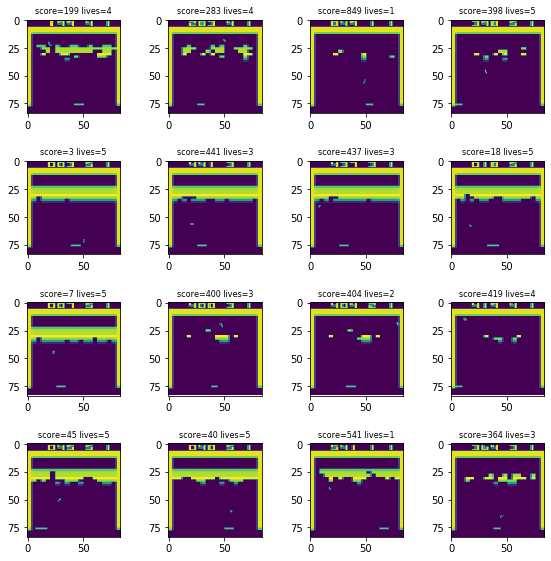

In [7]:
fig,axes = plt.subplots(4,4, figsize=(8,8))
fig.tight_layout()
for idx,i in enumerate(np.random.randint(0, obs.shape[0], 16)):
    obs_f = obs[i,:,:,3]
    score, lives = get_score_and_lives(frame=obs_f)
    axes[int(idx/4),int(idx%4)].set_title('score={} lives={}'.format(score, lives), fontsize=8)
    axes[int(idx/4),int(idx%4)].imshow(obs_f)
plt.show()

In [8]:
scores  = []
lives = []
for i in range(obs.shape[0]):
    obs_f = obs[i,:,:,3]
    print('{}) '.format(i), end=' ')
    score, live = get_score_and_lives(frame=obs_f)
    print(score,live)
    scores.append(score)
    lives.append(live)

0)  0 5
1)  0 5
2)  0 5
3)  0 5
4)  0 5
5)  0 5
6)  0 5
7)  0 5
8)  0 5
9)  0 5
10)  0 5
11)  0 5
12)  0 5
13)  0 5
14)  0 5
15)  0 5
16)  0 5
17)  0 5
18)  0 5
19)  0 5
20)  0 5
21)  0 5
22)  0 5
23)  0 5
24)  0 5
25)  0 5
26)  0 5
27)  0 5
28)  1 5
29)  1 5
30)  1 5
31)  1 5
32)  1 5
33)  1 5
34)  1 5
35)  1 5
36)  1 5
37)  1 5
38)  1 5
39)  1 5
40)  1 5
41)  1 5
42)  1 5
43)  1 5
44)  1 5
45)  1 5
46)  1 5
47)  1 5
48)  1 5
49)  1 5
50)  1 5
51)  1 5
52)  1 5
53)  1 5
54)  1 5
55)  1 5
56)  1 5
57)  1 5
58)  1 5
59)  1 5
60)  2 5
61)  2 5
62)  2 5
63)  2 5
64)  2 5
65)  2 5
66)  2 5
67)  2 5
68)  2 5
69)  2 5
70)  2 5
71)  2 5
72)  2 5
73)  2 5
74)  2 5
75)  2 5
76)  2 5
77)  2 5
78)  2 5
79)  2 5
80)  2 5
81)  2 5
82)  2 5
83)  2 5
84)  2 5
85)  2 5
86)  2 5
87)  2 5
88)  2 5
89)  2 5
90)  2 5
91)  2 5
92)  2 5
93)  2 5
94)  2 5
95)  2 5
96)  2 5
97)  2 5
98)  2 5
99)  2 5
100)  2 5
101)  3 5
102)  3 5
103)  3 5
104)  3 5
105)  3 5
106)  3 5
107)  3 5
108)  3 5
109)  3 5
110)  3 5


971)  65 3
972)  65 3
973)  65 3
974)  65 3
975)  65 3
976)  65 3
977)  65 3
978)  65 3
979)  65 3
980)  65 3
981)  65 3
982)  65 3
983)  65 3
984)  72 3
985)  72 3
986)  72 3
987)  79 3
988)  79 3
989)  79 3
990)  79 3
991)  86 3
992)  86 3
993)  86 3
994)  93 3
995)  93 3
996)  93 3
997)  93 3
998)  100 3
999)  100 3
1000)  100 3
1001)  100 3
1002)  107 3
1003)  107 3
1004)  107 3
1005)  107 3
1006)  114 3
1007)  114 3
1008)  114 3
1009)  114 3
1010)  121 3
1011)  121 3
1012)  121 3
1013)  128 3
1014)  128 3
1015)  128 3
1016)  128 3
1017)  128 3
1018)  135 3
1019)  135 3
1020)  135 3
1021)  135 3
1022)  158 3
1023)  142 3
1024)  142 3
1025)  142 3
1026)  142 3
1027)  148 3
1028)  149 3
1029)  149 3
1030)  149 3
1031)  149 3
1032)  156 3
1033)  156 3
1034)  156 3
1035)  188 3
1036)  163 3
1037)  163 3
1038)  163 3
1039)  188 3
1040)  170 3
1041)  170 3
1042)  170 3
1043)  170 3
1044)  177 3
1045)  177 3
1046)  177 3
1047)  189 3
1048)  184 3
1049)  184 3
1050)  184 3
1051)  184 3
105

1826)  411 2
1827)  411 2
1828)  411 2
1829)  415 2
1830)  415 2
1831)  415 2
1832)  415 2
1833)  415 2
1834)  415 2
1835)  415 2
1836)  415 2
1837)  415 2
1838)  415 2
1839)  415 2
1840)  415 2
1841)  415 2
1842)  415 2
1843)  415 2
1844)  415 2
1845)  415 2
1846)  415 2
1847)  415 2
1848)  415 2
1849)  415 2
1850)  415 2
1851)  416 2
1852)  416 2
1853)  416 2
1854)  416 2
1855)  416 2
1856)  416 2
1857)  416 2
1858)  416 2
1859)  416 2
1860)  416 2
1861)  416 2
1862)  416 2
1863)  416 2
1864)  416 2
1865)  416 2
1866)  417 2
1867)  417 2
1868)  417 2
1869)  417 2
1870)  417 2
1871)  417 2
1872)  417 2
1873)  417 2
1874)  417 2
1875)  417 2
1876)  417 2
1877)  417 2
1878)  417 2
1879)  417 2
1880)  417 2
1881)  417 2
1882)  417 2
1883)  417 2
1884)  417 2
1885)  417 2
1886)  417 2
1887)  417 2
1888)  417 2
1889)  418 2
1890)  418 2
1891)  418 2
1892)  418 2
1893)  418 2
1894)  418 2
1895)  418 2
1896)  418 2
1897)  418 2
1898)  418 2
1899)  418 2
1900)  418 2
1901)  418 2
1902)  418 2

2677)  427 1
2678)  427 1
2679)  427 1
2680)  427 1
2681)  427 1
2682)  427 1
2683)  427 1
2684)  427 1
2685)  427 1
2686)  431 1
2687)  431 1
2688)  431 1
2689)  431 1
2690)  431 1
2691)  431 1
2692)  431 1
2693)  431 1
2694)  431 1
2695)  431 1
2696)  431 1
2697)  431 1
2698)  431 1
2699)  431 1
2700)  431 1
2701)  431 1
2702)  431 1
2703)  431 1
2704)  431 1
2705)  431 1
2706)  431 1
2707)  431 1
2708)  431 1
2709)  431 1
2710)  431 1
2711)  431 1
2712)  431 1
2713)  431 1
2714)  431 1
2715)  431 1
2716)  432 1
2717)  432 1
2718)  432 1
2719)  432 1
2720)  432 1
2721)  432 1
2722)  432 1
2723)  432 1
2724)  432 1
2725)  432 1
2726)  432 1
2727)  432 1
2728)  432 1
2729)  432 1
2730)  432 1
2731)  432 1
2732)  432 1
2733)  432 1
2734)  432 1
2735)  432 1
2736)  432 1
2737)  432 1
2738)  432 1
2739)  432 1
2740)  433 1
2741)  433 1
2742)  433 1
2743)  433 1
2744)  433 1
2745)  433 1
2746)  433 1
2747)  433 1
2748)  433 1
2749)  433 1
2750)  433 1
2751)  433 1
2752)  433 1
2753)  433 1

3425)  476 1
3426)  476 1
3427)  476 1
3428)  477 1
3429)  477 1
3430)  477 1
3431)  477 1
3432)  477 1
3433)  477 1
3434)  477 1
3435)  477 1
3436)  477 1
3437)  477 1
3438)  477 1
3439)  477 1
3440)  477 1
3441)  477 1
3442)  477 1
3443)  478 1
3444)  478 1
3445)  478 1
3446)  478 1
3447)  478 1
3448)  478 1
3449)  478 1
3450)  478 1
3451)  478 1
3452)  478 1
3453)  0 5
3454)  0 5
3455)  0 5
3456)  0 5
3457)  0 5
3458)  0 5
3459)  0 5
3460)  0 5
3461)  0 5
3462)  0 5
3463)  0 5
3464)  0 5
3465)  0 5
3466)  0 5
3467)  0 5
3468)  0 5
3469)  0 5
3470)  0 5
3471)  0 5
3472)  0 5
3473)  0 5
3474)  0 5
3475)  0 5
3476)  0 5
3477)  0 5
3478)  0 5
3479)  0 5
3480)  0 5
3481)  0 5
3482)  1 5
3483)  1 5
3484)  1 5
3485)  1 5
3486)  1 5
3487)  1 5
3488)  1 5
3489)  1 5
3490)  1 5
3491)  1 5
3492)  1 5
3493)  1 5
3494)  1 5
3495)  1 5
3496)  1 5
3497)  1 5
3498)  1 5
3499)  1 5
3500)  1 5
3501)  1 5
3502)  1 5
3503)  1 5
3504)  1 5
3505)  1 5
3506)  1 5
3507)  1 5
3508)  1 5
3509)  1 5
3510)  1 

4293)  43 5
4294)  43 5
4295)  43 5
4296)  43 5
4297)  43 5
4298)  43 5
4299)  43 5
4300)  43 5
4301)  44 5
4302)  44 5
4303)  44 5
4304)  44 5
4305)  44 5
4306)  44 5
4307)  44 5
4308)  44 5
4309)  44 5
4310)  44 5
4311)  44 5
4312)  44 5
4313)  44 5
4314)  44 5
4315)  44 5
4316)  44 5
4317)  44 5
4318)  44 5
4319)  44 5
4320)  44 5
4321)  44 5
4322)  44 5
4323)  44 5
4324)  44 5
4325)  44 5
4326)  48 5
4327)  48 5
4328)  48 5
4329)  48 5
4330)  48 5
4331)  48 5
4332)  48 5
4333)  48 5
4334)  48 5
4335)  48 5
4336)  48 5
4337)  48 5
4338)  48 5
4339)  48 5
4340)  48 5
4341)  48 5
4342)  48 5
4343)  48 5
4344)  48 5
4345)  48 5
4346)  48 5
4347)  48 5
4348)  48 5
4349)  48 5
4350)  48 5
4351)  48 5
4352)  48 5
4353)  48 5
4354)  52 5
4355)  52 5
4356)  52 5
4357)  52 5
4358)  52 5
4359)  52 5
4360)  52 5
4361)  52 5
4362)  52 5
4363)  52 5
4364)  52 5
4365)  52 5
4366)  52 5
4367)  52 5
4368)  52 5
4369)  52 5
4370)  52 5
4371)  56 5
4372)  56 5
4373)  56 5
4374)  56 5
4375)  56 5
4376

5203)  309 4
5204)  309 4
5205)  309 4
5206)  309 4
5207)  309 4
5208)  309 4
5209)  309 4
5210)  309 4
5211)  309 4
5212)  309 4
5213)  309 4
5214)  309 4
5215)  309 4
5216)  309 4
5217)  309 4
5218)  309 4
5219)  309 4
5220)  309 3
5221)  309 3
5222)  309 3
5223)  309 3
5224)  309 3
5225)  309 3
5226)  309 3
5227)  309 3
5228)  309 3
5229)  309 3
5230)  309 3
5231)  309 3
5232)  309 3
5233)  309 3
5234)  309 3
5235)  309 3
5236)  309 3
5237)  309 3
5238)  309 3
5239)  309 3
5240)  309 3
5241)  309 3
5242)  309 3
5243)  309 3
5244)  309 3
5245)  309 3
5246)  309 3
5247)  309 3
5248)  309 3
5249)  309 3
5250)  309 3
5251)  309 3
5252)  309 3
5253)  309 3
5254)  309 3
5255)  309 3
5256)  309 3
5257)  309 3
5258)  309 3
5259)  309 3
5260)  309 3
5261)  309 3
5262)  309 3
5263)  309 3
5264)  313 3
5265)  313 3
5266)  313 3
5267)  313 3
5268)  313 3
5269)  313 3
5270)  313 3
5271)  313 3
5272)  313 3
5273)  313 3
5274)  313 3
5275)  313 3
5276)  313 3
5277)  313 3
5278)  313 3
5279)  313 3

6267)  24 5
6268)  24 5
6269)  24 5
6270)  24 5
6271)  24 5
6272)  24 5
6273)  24 5
6274)  24 5
6275)  25 5
6276)  25 5
6277)  25 5
6278)  25 5
6279)  25 5
6280)  25 5
6281)  25 5
6282)  25 5
6283)  25 5
6284)  25 5
6285)  25 5
6286)  25 5
6287)  25 5
6288)  25 5
6289)  25 5
6290)  25 5
6291)  25 5
6292)  25 5
6293)  25 5
6294)  25 5
6295)  25 5
6296)  25 5
6297)  25 5
6298)  25 5
6299)  25 5
6300)  25 5
6301)  29 5
6302)  29 5
6303)  29 5
6304)  29 5
6305)  29 5
6306)  29 5
6307)  29 5
6308)  29 5
6309)  29 5
6310)  29 5
6311)  29 5
6312)  29 5
6313)  29 5
6314)  29 5
6315)  29 5
6316)  29 5
6317)  29 5
6318)  29 5
6319)  29 5
6320)  29 5
6321)  29 5
6322)  29 5
6323)  29 5
6324)  29 5
6325)  29 5
6326)  30 5
6327)  30 5
6328)  30 5
6329)  30 5
6330)  30 5
6331)  30 5
6332)  30 5
6333)  30 5
6334)  30 5
6335)  30 5
6336)  30 5
6337)  30 5
6338)  30 5
6339)  30 5
6340)  30 5
6341)  30 5
6342)  30 5
6343)  30 5
6344)  30 5
6345)  30 5
6346)  30 5
6347)  30 5
6348)  30 5
6349)  30 5
6350

6968)  266 5
6969)  266 5
6970)  266 5
6971)  266 5
6972)  266 5
6973)  270 5
6974)  270 5
6975)  270 5
6976)  270 5
6977)  270 5
6978)  277 5
6979)  277 5
6980)  277 5
6981)  277 5
6982)  277 5
6983)  284 5
6984)  284 5
6985)  284 5
6986)  284 5
6987)  284 5
6988)  291 5
6989)  291 5
6990)  291 5
6991)  291 5
6992)  291 5
6993)  291 5
6994)  291 5
6995)  291 5
6996)  291 5
6997)  291 5
6998)  291 5
6999)  291 5
7000)  291 5
7001)  291 5
7002)  291 5
7003)  291 5
7004)  291 5
7005)  291 5
7006)  291 5
7007)  291 5
7008)  291 5
7009)  291 5
7010)  291 5
7011)  291 5
7012)  291 5
7013)  291 5
7014)  291 5
7015)  291 5
7016)  291 5
7017)  295 5
7018)  295 5
7019)  295 5
7020)  295 5
7021)  295 5
7022)  295 5
7023)  295 5
7024)  299 5
7025)  299 5
7026)  299 5
7027)  299 5
7028)  299 5
7029)  299 5
7030)  306 5
7031)  306 5
7032)  306 5
7033)  306 5
7034)  306 5
7035)  313 5
7036)  313 5
7037)  313 5
7038)  313 5
7039)  313 5
7040)  320 5
7041)  320 5
7042)  320 5
7043)  320 5
7044)  320 5

7801)  428 5
7802)  428 5
7803)  428 5
7804)  428 5
7805)  428 5
7806)  428 5
7807)  428 5
7808)  428 5
7809)  428 5
7810)  428 5
7811)  428 5
7812)  428 5
7813)  428 5
7814)  428 5
7815)  428 5
7816)  428 5
7817)  428 5
7818)  428 5
7819)  428 5
7820)  428 5
7821)  428 5
7822)  428 5
7823)  428 5
7824)  428 5
7825)  428 5
7826)  428 5
7827)  428 5
7828)  428 5
7829)  428 5
7830)  428 5
7831)  428 5
7832)  428 5
7833)  428 5
7834)  428 5
7835)  428 5
7836)  428 5
7837)  428 5
7838)  428 5
7839)  428 5
7840)  428 5
7841)  428 5
7842)  428 5
7843)  428 5
7844)  428 5
7845)  428 5
7846)  428 5
7847)  428 5
7848)  428 5
7849)  428 5
7850)  428 5
7851)  428 5
7852)  428 5
7853)  428 5
7854)  428 5
7855)  428 5
7856)  428 5
7857)  428 5
7858)  428 5
7859)  428 5
7860)  428 5
7861)  428 5
7862)  428 5
7863)  428 5
7864)  428 5
7865)  428 5
7866)  428 5
7867)  428 5
7868)  428 5
7869)  428 5
7870)  428 5
7871)  428 5
7872)  428 5
7873)  428 5
7874)  428 5
7875)  428 5
7876)  428 5
7877)  428 5

8714)  444 3
8715)  444 3
8716)  444 3
8717)  444 3
8718)  444 3
8719)  444 3
8720)  445 3
8721)  445 3
8722)  445 3
8723)  445 3
8724)  445 3
8725)  445 3
8726)  445 3
8727)  445 3
8728)  445 3
8729)  445 3
8730)  445 3
8731)  445 3
8732)  445 3
8733)  445 3
8734)  445 3
8735)  445 3
8736)  445 3
8737)  445 3
8738)  445 3
8739)  445 3
8740)  445 3
8741)  445 3
8742)  445 3
8743)  445 3
8744)  446 3
8745)  446 3
8746)  446 3
8747)  446 3
8748)  446 3
8749)  446 3
8750)  446 3
8751)  446 3
8752)  446 3
8753)  446 3
8754)  446 3
8755)  446 3
8756)  446 3
8757)  446 3
8758)  446 3
8759)  446 3
8760)  446 3
8761)  446 3
8762)  446 3
8763)  446 3
8764)  446 3
8765)  446 3
8766)  446 3
8767)  446 3
8768)  446 3
8769)  446 3
8770)  450 3
8771)  450 3
8772)  450 3
8773)  450 3
8774)  450 3
8775)  450 3
8776)  450 3
8777)  450 3
8778)  450 3
8779)  450 3
8780)  450 3
8781)  450 3
8782)  450 3
8783)  450 3
8784)  450 3
8785)  450 3
8786)  450 3
8787)  450 3
8788)  450 3
8789)  450 3
8790)  450 3

9634)  756 2
9635)  756 2
9636)  756 2
9637)  756 2
9638)  756 2
9639)  756 2
9640)  756 2
9641)  756 2
9642)  756 2
9643)  756 2
9644)  756 2
9645)  756 2
9646)  756 2
9647)  756 2
9648)  756 2
9649)  756 2
9650)  756 2
9651)  756 2
9652)  756 2
9653)  756 2
9654)  756 2
9655)  756 2
9656)  756 2
9657)  756 2
9658)  756 2
9659)  757 2
9660)  757 2
9661)  757 2
9662)  757 2
9663)  757 2
9664)  757 2
9665)  757 2
9666)  783 2
9667)  761 2
9668)  761 2
9669)  761 2
9670)  761 2
9671)  761 2
9672)  761 2
9673)  761 2
9674)  761 2
9675)  761 2
9676)  761 2
9677)  761 2
9678)  761 2
9679)  761 2
9680)  761 2
9681)  761 2
9682)  761 2
9683)  761 2
9684)  761 2
9685)  761 2
9686)  761 2
9687)  761 2
9688)  761 2
9689)  761 2
9690)  761 2
9691)  761 2
9692)  761 2
9693)  761 2
9694)  761 2
9695)  768 2
9696)  768 2
9697)  768 2
9698)  768 2
9699)  768 2
9700)  772 2
9701)  772 2
9702)  772 2
9703)  772 2
9704)  772 2
9705)  772 2
9706)  772 2
9707)  772 2
9708)  772 2
9709)  772 2
9710)  772 2

10301)  837 1
10302)  837 1
10303)  837 1
10304)  837 1
10305)  837 1
10306)  837 1
10307)  837 1
10308)  837 1
10309)  837 1
10310)  837 1
10311)  837 1
10312)  837 1
10313)  837 1
10314)  859 1
10315)  844 1
10316)  844 1
10317)  844 1
10318)  844 1
10319)  844 1
10320)  844 1
10321)  844 1
10322)  844 1
10323)  844 1
10324)  844 1
10325)  844 1
10326)  844 1
10327)  844 1
10328)  844 1
10329)  844 1
10330)  844 1
10331)  844 1
10332)  848 1
10333)  848 1
10334)  848 1
10335)  848 1
10336)  848 1
10337)  848 1
10338)  848 1
10339)  848 1
10340)  848 1
10341)  848 1
10342)  848 1
10343)  848 1
10344)  848 1
10345)  848 1
10346)  848 1
10347)  848 1
10348)  848 1
10349)  848 1
10350)  848 1
10351)  848 1
10352)  848 1
10353)  848 1
10354)  848 1
10355)  848 1
10356)  848 1
10357)  848 1
10358)  848 1
10359)  848 1
10360)  848 1
10361)  848 1
10362)  848 1
10363)  848 1
10364)  848 1
10365)  848 1
10366)  848 1
10367)  848 1
10368)  848 1
10369)  848 1
10370)  848 1
10371)  849 1
10372)

11017)  849 1
11018)  849 1
11019)  849 1
11020)  849 1
11021)  849 1
11022)  849 1
11023)  849 1
11024)  849 1
11025)  0 5
11026)  0 5
11027)  0 5
11028)  0 5
11029)  0 5
11030)  0 5
11031)  0 5
11032)  0 5
11033)  0 5
11034)  0 5
11035)  0 5
11036)  0 5
11037)  0 5
11038)  0 5
11039)  0 5
11040)  0 5
11041)  0 5
11042)  0 5
11043)  0 5
11044)  0 5
11045)  0 5
11046)  0 5
11047)  0 5
11048)  0 5
11049)  0 5
11050)  0 5
11051)  0 5
11052)  0 5
11053)  0 5
11054)  1 5
11055)  1 5
11056)  1 5
11057)  1 5
11058)  1 5
11059)  1 5
11060)  1 5
11061)  1 5
11062)  1 5
11063)  1 5
11064)  1 5
11065)  1 5
11066)  1 5
11067)  1 5
11068)  1 5
11069)  1 5
11070)  1 5
11071)  1 5
11072)  1 5
11073)  1 5
11074)  1 5
11075)  1 5
11076)  1 5
11077)  1 5
11078)  1 5
11079)  1 5
11080)  1 5
11081)  1 5
11082)  1 5
11083)  1 5
11084)  1 5
11085)  1 5
11086)  1 5
11087)  2 5
11088)  2 5
11089)  2 5
11090)  2 5
11091)  2 5
11092)  2 5
11093)  2 5
11094)  2 5
11095)  2 5
11096)  2 5
11097)  2 5
11098)  2 5


11837)  39 5
11838)  39 5
11839)  39 5
11840)  39 5
11841)  39 5
11842)  39 5
11843)  39 5
11844)  39 5
11845)  39 5
11846)  39 5
11847)  58 5
11848)  40 5
11849)  40 5
11850)  40 5
11851)  40 5
11852)  40 5
11853)  40 5
11854)  40 5
11855)  40 5
11856)  40 5
11857)  40 5
11858)  40 5
11859)  40 5
11860)  40 5
11861)  40 5
11862)  40 5
11863)  40 5
11864)  40 5
11865)  40 5
11866)  40 5
11867)  40 5
11868)  40 5
11869)  40 5
11870)  40 5
11871)  40 5
11872)  40 5
11873)  44 5
11874)  44 5
11875)  44 5
11876)  44 5
11877)  44 5
11878)  44 5
11879)  44 5
11880)  44 5
11881)  44 5
11882)  44 5
11883)  44 5
11884)  44 5
11885)  44 5
11886)  44 5
11887)  44 5
11888)  44 5
11889)  44 5
11890)  44 5
11891)  44 5
11892)  44 5
11893)  44 5
11894)  44 5
11895)  44 5
11896)  44 5
11897)  44 5
11898)  44 5
11899)  48 5
11900)  45 5
11901)  45 5
11902)  45 5
11903)  45 5
11904)  45 5
11905)  45 5
11906)  45 5
11907)  45 5
11908)  45 5
11909)  45 5
11910)  45 5
11911)  45 5
11912)  45 5
11913)  45 5

12661)  331 3
12662)  331 3
12663)  331 3
12664)  331 3
12665)  331 3
12666)  331 3
12667)  331 3
12668)  331 3
12669)  331 3
12670)  331 3
12671)  331 3
12672)  331 3
12673)  331 3
12674)  331 3
12675)  331 3
12676)  331 3
12677)  331 3
12678)  331 3
12679)  331 3
12680)  331 3
12681)  331 3
12682)  331 3
12683)  331 3
12684)  331 3
12685)  331 3
12686)  331 3
12687)  331 3
12688)  331 3
12689)  331 3
12690)  331 3
12691)  331 3
12692)  331 3
12693)  331 3
12694)  331 3
12695)  331 3
12696)  335 3
12697)  335 3
12698)  335 3
12699)  335 3
12700)  335 3
12701)  335 3
12702)  335 3
12703)  335 3
12704)  335 3
12705)  335 3
12706)  335 3
12707)  335 3
12708)  335 3
12709)  335 3
12710)  335 3
12711)  335 3
12712)  335 3
12713)  335 3
12714)  335 3
12715)  335 3
12716)  335 3
12717)  335 3
12718)  335 3
12719)  335 3
12720)  335 3
12721)  335 3
12722)  335 3
12723)  335 3
12724)  335 3
12725)  339 3
12726)  339 3
12727)  339 3
12728)  339 3
12729)  339 3
12730)  339 3
12731)  339 3
12732)

13622)  15 5
13623)  15 5
13624)  15 5
13625)  15 5
13626)  15 5
13627)  15 5
13628)  15 5
13629)  15 5
13630)  15 5
13631)  15 5
13632)  15 5
13633)  15 5
13634)  16 5
13635)  16 5
13636)  16 5
13637)  16 5
13638)  16 5
13639)  16 5
13640)  16 5
13641)  16 5
13642)  16 5
13643)  16 5
13644)  16 5
13645)  16 5
13646)  16 5
13647)  16 5
13648)  16 5
13649)  16 5
13650)  16 5
13651)  16 5
13652)  16 5
13653)  16 5
13654)  16 5
13655)  16 5
13656)  16 5
13657)  16 5
13658)  17 5
13659)  17 5
13660)  17 5
13661)  17 5
13662)  17 5
13663)  17 5
13664)  17 5
13665)  17 5
13666)  17 5
13667)  17 5
13668)  17 5
13669)  17 5
13670)  17 5
13671)  17 5
13672)  17 5
13673)  17 5
13674)  17 5
13675)  17 5
13676)  17 5
13677)  17 5
13678)  17 5
13679)  17 5
13680)  17 5
13681)  17 5
13682)  18 5
13683)  18 5
13684)  18 5
13685)  18 5
13686)  18 5
13687)  18 5
13688)  18 5
13689)  18 5
13690)  18 5
13691)  18 5
13692)  18 5
13693)  18 5
13694)  18 5
13695)  18 5
13696)  18 5
13697)  18 5
13698)  18 5

14569)  355 4
14570)  355 4
14571)  355 4
14572)  355 4
14573)  355 4
14574)  355 4
14575)  355 4
14576)  355 4
14577)  355 4
14578)  355 4
14579)  355 4
14580)  355 4
14581)  355 4
14582)  355 4
14583)  355 4
14584)  355 4
14585)  355 4
14586)  355 4
14587)  355 4
14588)  355 4
14589)  355 4
14590)  355 4
14591)  355 4
14592)  355 4
14593)  355 4
14594)  355 4
14595)  359 4
14596)  359 4
14597)  359 4
14598)  359 4
14599)  359 4
14600)  359 4
14601)  359 4
14602)  360 4
14603)  360 4
14604)  360 4
14605)  360 4
14606)  360 4
14607)  360 4
14608)  360 4
14609)  360 4
14610)  360 4
14611)  360 4
14612)  360 4
14613)  360 4
14614)  360 4
14615)  360 4
14616)  360 4
14617)  360 4
14618)  360 4
14619)  360 4
14620)  360 4
14621)  360 4
14622)  360 4
14623)  360 4
14624)  360 4
14625)  360 4
14626)  360 4
14627)  360 4
14628)  360 4
14629)  360 4
14630)  360 4
14631)  360 4
14632)  360 4
14633)  361 4
14634)  361 4
14635)  361 4
14636)  361 4
14637)  361 4
14638)  361 4
14639)  361 4
14640)

15632)  400 2
15633)  400 2
15634)  400 2
15635)  400 2
15636)  400 2
15637)  400 2
15638)  400 2
15639)  400 2
15640)  400 2
15641)  400 2
15642)  400 2
15643)  400 2
15644)  400 2
15645)  400 2
15646)  400 2
15647)  400 2
15648)  400 2
15649)  400 2
15650)  400 2
15651)  400 2
15652)  400 2
15653)  400 2
15654)  400 2
15655)  400 2
15656)  400 2
15657)  400 2
15658)  400 2
15659)  400 2
15660)  400 2
15661)  400 2
15662)  400 2
15663)  400 2
15664)  400 2
15665)  400 2
15666)  400 2
15667)  400 2
15668)  400 2
15669)  400 2
15670)  400 2
15671)  400 2
15672)  400 2
15673)  400 2
15674)  400 2
15675)  400 2
15676)  400 2
15677)  400 2
15678)  400 2
15679)  400 2
15680)  400 2
15681)  400 2
15682)  400 2
15683)  400 2
15684)  400 2
15685)  400 2
15686)  408 2
15687)  404 2
15688)  404 2
15689)  404 2
15690)  404 2
15691)  404 2
15692)  404 2
15693)  404 2
15694)  404 2
15695)  404 2
15696)  404 2
15697)  404 2
15698)  404 2
15699)  404 2
15700)  404 2
15701)  404 2
15702)  404 2
15703)

16349)  421 2
16350)  421 2
16351)  421 2
16352)  421 2
16353)  421 2
16354)  421 2
16355)  421 2
16356)  421 2
16357)  421 2
16358)  421 2
16359)  421 2
16360)  421 2
16361)  421 2
16362)  421 2
16363)  421 2
16364)  421 2
16365)  421 2
16366)  421 2
16367)  421 2
16368)  421 2
16369)  421 2
16370)  421 2
16371)  421 2
16372)  421 2
16373)  421 2
16374)  421 2
16375)  421 2
16376)  425 2
16377)  425 2
16378)  425 2
16379)  425 2
16380)  425 2
16381)  425 2
16382)  425 2
16383)  425 2
16384)  425 2
16385)  425 2
16386)  425 2
16387)  425 2
16388)  425 2
16389)  425 2
16390)  425 2
16391)  425 2
16392)  425 2
16393)  425 2
16394)  425 2
16395)  425 2
16396)  425 2
16397)  425 2
16398)  425 2
16399)  425 2
16400)  425 2
16401)  425 2
16402)  425 2
16403)  425 2
16404)  425 2
16405)  425 2
16406)  425 2
16407)  425 2
16408)  425 2
16409)  425 2
16410)  425 2
16411)  425 2
16412)  425 2
16413)  425 2
16414)  425 2
16415)  425 2
16416)  425 2
16417)  425 2
16418)  425 2
16419)  425 2
16420)

17465)  5 5
17466)  5 5
17467)  5 5
17468)  5 5
17469)  5 5
17470)  8 5
17471)  9 5
17472)  9 5
17473)  9 5
17474)  9 5
17475)  9 5
17476)  9 5
17477)  9 5
17478)  9 5
17479)  9 5
17480)  9 5
17481)  9 5
17482)  9 5
17483)  9 5
17484)  9 5
17485)  9 5
17486)  9 5
17487)  9 5
17488)  9 5
17489)  9 5
17490)  9 5
17491)  9 5
17492)  9 5
17493)  9 5
17494)  9 5
17495)  9 5
17496)  10 5
17497)  10 5
17498)  10 5
17499)  10 5
17500)  10 5
17501)  10 5
17502)  10 5
17503)  10 5
17504)  10 5
17505)  10 5
17506)  10 5
17507)  10 5
17508)  10 5
17509)  10 5
17510)  10 5
17511)  10 5
17512)  10 5
17513)  10 5
17514)  10 5
17515)  10 5
17516)  10 5
17517)  10 5
17518)  10 5
17519)  10 5
17520)  10 5
17521)  10 5
17522)  10 5
17523)  10 5
17524)  10 5
17525)  10 5
17526)  10 5
17527)  10 5
17528)  10 5
17529)  10 5
17530)  10 5
17531)  10 5
17532)  11 5
17533)  11 5
17534)  11 5
17535)  11 5
17536)  11 5
17537)  11 5
17538)  11 5
17539)  11 5
17540)  11 5
17541)  11 5
17542)  11 5
17543)  11 5
1754

18186)  86 5
18187)  86 5
18188)  86 5
18189)  86 5
18190)  86 5
18191)  86 5
18192)  86 5
18193)  93 5
18194)  93 5
18195)  93 5
18196)  888 5
18197)  100 5
18198)  100 5
18199)  100 5
18200)  107 5
18201)  107 5
18202)  107 5
18203)  189 5
18204)  114 5
18205)  114 5
18206)  114 5
18207)  121 5
18208)  121 5
18209)  121 5
18210)  121 5
18211)  128 5
18212)  128 5
18213)  128 5
18214)  128 5
18215)  135 5
18216)  135 5
18217)  135 5
18218)  158 5
18219)  142 5
18220)  142 5
18221)  142 5
18222)  149 5
18223)  149 5
18224)  149 5
18225)  149 5
18226)  156 5
18227)  156 5
18228)  156 5
18229)  156 5
18230)  188 5
18231)  163 5
18232)  163 5
18233)  163 5
18234)  170 5
18235)  170 5
18236)  170 5
18237)  170 5
18238)  177 5
18239)  177 5
18240)  177 5
18241)  184 5
18242)  184 5
18243)  184 5
18244)  189 5
18245)  191 5
18246)  191 5
18247)  191 5
18248)  191 5
18249)  198 5
18250)  198 5
18251)  198 5
18252)  198 5
18253)  198 5
18254)  205 5
18255)  205 5
18256)  205 5
18257)  205 5
18

18908)  390 5
18909)  390 5
18910)  390 5
18911)  390 5
18912)  390 5
18913)  390 5
18914)  390 5
18915)  390 5
18916)  390 5
18917)  390 5
18918)  390 5
18919)  390 5
18920)  390 5
18921)  390 5
18922)  390 5
18923)  390 5
18924)  390 5
18925)  390 5
18926)  390 5
18927)  390 5
18928)  390 5
18929)  390 5
18930)  390 5
18931)  390 5
18932)  390 5
18933)  390 5
18934)  390 5
18935)  390 5
18936)  390 5
18937)  390 5
18938)  390 5
18939)  390 5
18940)  390 5
18941)  390 5
18942)  390 5
18943)  390 5
18944)  390 5
18945)  390 5
18946)  390 5
18947)  390 5
18948)  390 5
18949)  390 5
18950)  390 5
18951)  390 5
18952)  390 5
18953)  390 5
18954)  390 5
18955)  390 5
18956)  390 4
18957)  390 4
18958)  390 4
18959)  390 4
18960)  390 4
18961)  390 4
18962)  390 4
18963)  390 4
18964)  390 4
18965)  390 4
18966)  390 4
18967)  390 4
18968)  390 4
18969)  390 4
18970)  390 4
18971)  390 4
18972)  390 4
18973)  390 4
18974)  390 4
18975)  390 4
18976)  390 4
18977)  390 4
18978)  390 4
18979)

19803)  419 4
19804)  419 4
19805)  419 4
19806)  419 4
19807)  419 4
19808)  419 4
19809)  419 4
19810)  419 4
19811)  419 4
19812)  419 4
19813)  419 4
19814)  419 4
19815)  419 4
19816)  419 4
19817)  419 4
19818)  419 4
19819)  419 4
19820)  419 4
19821)  419 4
19822)  419 4
19823)  419 4
19824)  419 4
19825)  419 4
19826)  419 4
19827)  419 4
19828)  419 4
19829)  419 4
19830)  419 4
19831)  419 4
19832)  419 4
19833)  419 4
19834)  419 4
19835)  419 4
19836)  419 4
19837)  419 4
19838)  419 4
19839)  419 4
19840)  419 4
19841)  419 4
19842)  419 4
19843)  419 4
19844)  419 4
19845)  419 4
19846)  419 4
19847)  419 4
19848)  419 4
19849)  419 4
19850)  419 4
19851)  419 4
19852)  419 4
19853)  419 4
19854)  419 4
19855)  419 4
19856)  419 4
19857)  419 4
19858)  419 4
19859)  419 4
19860)  419 4
19861)  419 4
19862)  419 4
19863)  419 4
19864)  419 4
19865)  419 4
19866)  419 4
19867)  419 4
19868)  419 4
19869)  419 4
19870)  419 4
19871)  419 4
19872)  419 4
19873)  419 4
19874)

20797)  425 3
20798)  425 3
20799)  425 3
20800)  425 3
20801)  425 3
20802)  425 3
20803)  425 3
20804)  425 3
20805)  425 3
20806)  425 3
20807)  425 3
20808)  425 3
20809)  425 3
20810)  425 3
20811)  425 3
20812)  425 3
20813)  425 3
20814)  425 3
20815)  425 3
20816)  425 3
20817)  425 3
20818)  425 3
20819)  425 3
20820)  425 3
20821)  425 3
20822)  425 3
20823)  425 3
20824)  425 3
20825)  425 3
20826)  425 3
20827)  425 3
20828)  425 3
20829)  425 3
20830)  425 3
20831)  425 3
20832)  425 3
20833)  425 3
20834)  425 3
20835)  425 3
20836)  425 3
20837)  425 3
20838)  425 3
20839)  425 3
20840)  425 3
20841)  425 3
20842)  425 3
20843)  425 3
20844)  425 3
20845)  425 3
20846)  425 3
20847)  425 3
20848)  425 3
20849)  425 3
20850)  425 3
20851)  425 3
20852)  425 3
20853)  425 3
20854)  425 3
20855)  425 3
20856)  425 3
20857)  425 3
20858)  425 3
20859)  425 3
20860)  425 3
20861)  425 3
20862)  425 3
20863)  425 3
20864)  425 3
20865)  425 3
20866)  425 3
20867)  425 3
20868)

21630)  438 3
21631)  439 3
21632)  439 3
21633)  439 3
21634)  439 3
21635)  439 3
21636)  439 3
21637)  439 3
21638)  439 3
21639)  439 3
21640)  439 3
21641)  439 3
21642)  439 3
21643)  439 3
21644)  439 3
21645)  439 3
21646)  439 3
21647)  439 3
21648)  439 3
21649)  439 3
21650)  439 3
21651)  439 3
21652)  439 3
21653)  439 3
21654)  439 3
21655)  439 3
21656)  458 3
21657)  440 3
21658)  440 3
21659)  440 3
21660)  440 3
21661)  440 3
21662)  440 3
21663)  440 3
21664)  440 3
21665)  440 3
21666)  440 3
21667)  440 3
21668)  440 3
21669)  440 3
21670)  440 3
21671)  440 3
21672)  440 3
21673)  440 3
21674)  440 3
21675)  440 3
21676)  440 3
21677)  440 3
21678)  440 3
21679)  440 3
21680)  440 3
21681)  441 3
21682)  441 3
21683)  441 3
21684)  441 3
21685)  441 3
21686)  441 3
21687)  441 3
21688)  441 3
21689)  441 3
21690)  441 3
21691)  441 3
21692)  441 3
21693)  441 3
21694)  441 3
21695)  441 3
21696)  441 3
21697)  441 3
21698)  441 3
21699)  441 3
21700)  441 3
21701)

22305)  473 2
22306)  473 2
22307)  473 2
22308)  473 2
22309)  473 2
22310)  473 2
22311)  473 2
22312)  473 2
22313)  473 2
22314)  477 2
22315)  477 2
22316)  477 2
22317)  477 2
22318)  477 2
22319)  477 2
22320)  477 2
22321)  477 2
22322)  477 2
22323)  477 2
22324)  477 2
22325)  477 2
22326)  477 2
22327)  477 2
22328)  477 2
22329)  477 2
22330)  477 2
22331)  477 2
22332)  477 2
22333)  477 2
22334)  477 2
22335)  477 2
22336)  477 2
22337)  477 2
22338)  477 2
22339)  477 2
22340)  483 2
22341)  481 2
22342)  481 2
22343)  481 2
22344)  481 2
22345)  481 2
22346)  481 2
22347)  481 2
22348)  481 2
22349)  481 2
22350)  481 2
22351)  481 2
22352)  481 2
22353)  481 2
22354)  481 2
22355)  481 2
22356)  481 2
22357)  481 2
22358)  481 2
22359)  481 2
22360)  481 2
22361)  481 2
22362)  481 2
22363)  481 2
22364)  481 2
22365)  481 2
22366)  481 2
22367)  481 2
22368)  481 2
22369)  481 2
22370)  481 2
22371)  481 2
22372)  481 2
22373)  481 2
22374)  481 2
22375)  481 2
22376)

23286)  5 5
23287)  5 5
23288)  5 5
23289)  5 5
23290)  5 5
23291)  5 5
23292)  5 5
23293)  5 5
23294)  5 5
23295)  5 5
23296)  5 5
23297)  5 5
23298)  5 5
23299)  5 5
23300)  5 5
23301)  5 5
23302)  5 5
23303)  5 5
23304)  5 5
23305)  5 5
23306)  5 5
23307)  5 5
23308)  6 5
23309)  6 5
23310)  6 5
23311)  6 5
23312)  6 5
23313)  6 5
23314)  6 5
23315)  6 5
23316)  6 5
23317)  6 5
23318)  6 5
23319)  6 5
23320)  6 5
23321)  6 5
23322)  6 5
23323)  6 5
23324)  6 5
23325)  6 5
23326)  6 5
23327)  6 5
23328)  6 5
23329)  6 5
23330)  6 5
23331)  6 5
23332)  7 5
23333)  7 5
23334)  7 5
23335)  7 5
23336)  7 5
23337)  7 5
23338)  7 5
23339)  7 5
23340)  7 5
23341)  7 5
23342)  7 5
23343)  7 5
23344)  7 5
23345)  7 5
23346)  7 5
23347)  7 5
23348)  7 5
23349)  7 5
23350)  7 5
23351)  7 5
23352)  7 5
23353)  7 5
23354)  7 5
23355)  7 5
23356)  7 5
23357)  7 5
23358)  7 5
23359)  7 5
23360)  7 5
23361)  7 5
23362)  7 5
23363)  7 5
23364)  7 5
23365)  7 5
23366)  7 5
23367)  8 5
23368)  8 5
2336

24277)  100 4
24278)  100 4
24279)  100 4
24280)  100 4
24281)  100 4
24282)  101 4
24283)  101 4
24284)  101 4
24285)  101 4
24286)  101 4
24287)  101 4
24288)  101 4
24289)  101 4
24290)  101 4
24291)  101 4
24292)  101 4
24293)  101 4
24294)  101 4
24295)  101 4
24296)  101 4
24297)  101 4
24298)  105 4
24299)  105 4
24300)  105 4
24301)  105 4
24302)  105 4
24303)  105 4
24304)  105 4
24305)  105 4
24306)  105 4
24307)  105 4
24308)  105 4
24309)  105 4
24310)  105 4
24311)  105 4
24312)  105 4
24313)  105 4
24314)  105 4
24315)  105 4
24316)  112 4
24317)  112 4
24318)  112 4
24319)  112 4
24320)  112 4
24321)  112 4
24322)  112 4
24323)  112 4
24324)  112 4
24325)  112 4
24326)  112 4
24327)  112 4
24328)  112 4
24329)  112 4
24330)  112 4
24331)  112 4
24332)  112 4
24333)  116 4
24334)  116 4
24335)  116 4
24336)  116 4
24337)  116 4
24338)  116 4
24339)  116 4
24340)  116 4
24341)  116 4
24342)  116 4
24343)  116 4
24344)  116 4
24345)  116 4
24346)  116 4
24347)  116 4
24348)

25128)  424 3
25129)  424 3
25130)  424 3
25131)  424 3
25132)  424 3
25133)  424 3
25134)  424 3
25135)  424 3
25136)  424 3
25137)  424 3
25138)  424 3
25139)  424 3
25140)  424 3
25141)  424 3
25142)  424 3
25143)  424 3
25144)  424 3
25145)  424 3
25146)  424 3
25147)  424 3
25148)  424 3
25149)  424 3
25150)  424 3
25151)  424 3
25152)  424 3
25153)  424 3
25154)  424 3
25155)  424 3
25156)  424 3
25157)  424 3
25158)  424 3
25159)  424 3
25160)  424 3
25161)  424 3
25162)  424 3
25163)  424 3
25164)  424 3
25165)  424 3
25166)  424 3
25167)  424 3
25168)  424 3
25169)  424 3
25170)  424 3
25171)  424 3
25172)  424 3
25173)  424 3
25174)  424 3
25175)  424 3
25176)  424 3
25177)  424 3
25178)  424 3
25179)  424 3
25180)  424 3
25181)  424 3
25182)  424 3
25183)  424 3
25184)  424 3
25185)  424 3
25186)  424 3
25187)  424 3
25188)  424 3
25189)  424 3
25190)  424 2
25191)  424 2
25192)  424 2
25193)  424 2
25194)  424 2
25195)  424 2
25196)  424 2
25197)  424 2
25198)  424 2
25199)

26078)  33 4
26079)  33 4
26080)  33 4
26081)  33 4
26082)  33 4
26083)  33 4
26084)  33 4
26085)  33 4
26086)  33 4
26087)  33 4
26088)  33 4
26089)  33 4
26090)  33 4
26091)  33 4
26092)  33 4
26093)  33 4
26094)  33 4
26095)  33 4
26096)  33 4
26097)  33 4
26098)  33 4
26099)  33 4
26100)  33 4
26101)  38 4
26102)  34 4
26103)  34 4
26104)  34 4
26105)  34 4
26106)  34 4
26107)  34 4
26108)  34 4
26109)  34 4
26110)  34 4
26111)  34 4
26112)  34 4
26113)  34 4
26114)  34 4
26115)  34 4
26116)  34 4
26117)  34 4
26118)  34 4
26119)  34 4
26120)  34 4
26121)  34 4
26122)  34 4
26123)  34 4
26124)  34 4
26125)  34 4
26126)  34 4
26127)  34 4
26128)  34 4
26129)  34 4
26130)  34 4
26131)  34 4
26132)  34 4
26133)  34 4
26134)  34 4
26135)  34 4
26136)  34 4
26137)  34 4
26138)  34 4
26139)  41 4
26140)  41 4
26141)  41 4
26142)  41 4
26143)  41 4
26144)  41 4
26145)  41 4
26146)  41 4
26147)  41 4
26148)  41 4
26149)  41 4
26150)  41 4
26151)  41 4
26152)  41 4
26153)  41 4
26154)  41 4

<IPython.core.display.Javascript object>


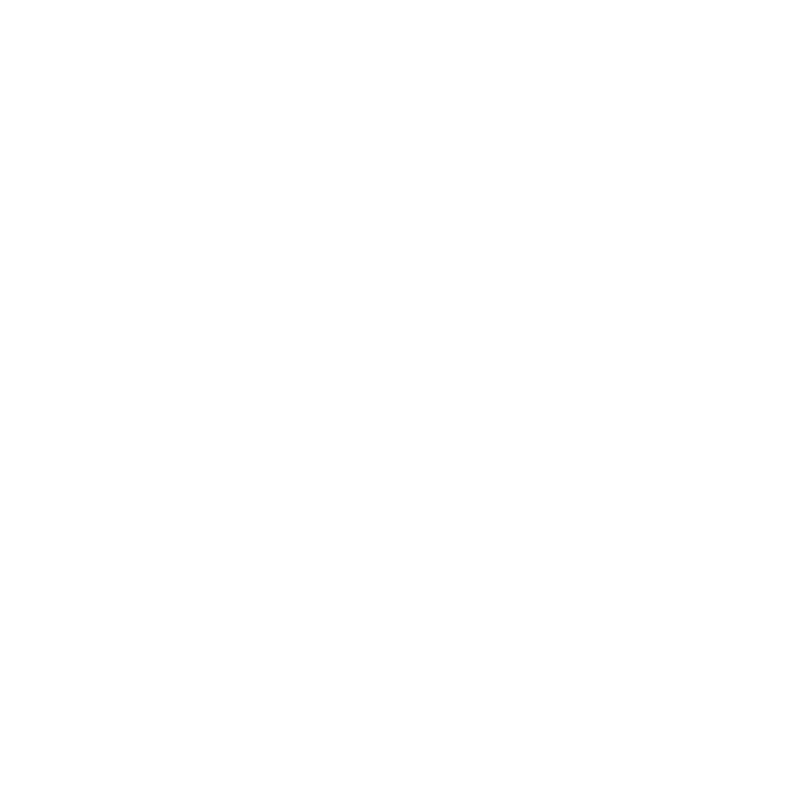

NameError: name 'scores' is not defined

In [4]:
fig, ax1 = plt.subplots(figsize=(8,8))

color = 'tab:red'
ax1.plot(scores, color=color)
ax1.set_xlabel('timesteps')
ax1.set_ylabel('scores', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('lives', color=color)  # we already handled the x-label with ax1
ax2.plot(lives, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [10]:
np.save(os.path.join(exp_dir, "score"), np.array(scores))
np.save(os.path.join(exp_dir, "lives"), np.array(lives))